In [2]:
import sys
sys.path
sys.path.append('/home/helge/code/back_of_the_envelope')

import pandas as pd
import random
import json

from forecasters import get_forecaster, forecast_election

forecast = {}

for region in [ "Berlin", "Bremen", "Hessen", "Bayern"]:
    fc = get_forecaster(region)
    forecast[region] = forecast_election(fc)
    print(region)
    print(forecast[region])
    print()

with open("election_data_20221117.json", "w") as f:
    json.dump(forecast, f)


Berlin
{'Chance to be in parliament': [{'name': 'CDU', 'percentage': 100.0}, {'name': 'SPD', 'percentage': 100.0}, {'name': 'GRÜNE', 'percentage': 100.0}, {'name': 'LINKE', 'percentage': 96.9}, {'name': 'AfD', 'percentage': 90.3}, {'name': 'FDP', 'percentage': 63.3}], 'Probability of Government': [{'name': 'SPD GRÜNE LINKE', 'percentage': 23.2}, {'name': 'GRÜNE SPD LINKE', 'percentage': 18.6}, {'name': 'CDU GRÜNE', 'percentage': 10.1}, {'name': 'SPD GRÜNE', 'percentage': 9.4}, {'name': 'GRÜNE SPD', 'percentage': 7.9}, {'name': 'GRÜNE CDU', 'percentage': 6.8}, {'name': 'SPD CDU', 'percentage': 2.1}]}

Bremen
{'Chance to be in parliament': [{'name': 'CDU', 'percentage': 100.0}, {'name': 'SPD', 'percentage': 100.0}, {'name': 'GRÜNE', 'percentage': 100.0}, {'name': 'LINKE', 'percentage': 73.3}, {'name': 'FDP', 'percentage': 48.5}, {'name': 'AfD', 'percentage': 48.0}], 'Probability of Government': [{'name': 'SPD GRÜNE', 'percentage': 45.6}, {'name': 'CDU GRÜNE', 'percentage': 11.3}, {'name'

In [ ]:
import sys
sys.path
sys.path.append('/home/helge/code/back_of_the_envelope')

import pandas as pd
import random
import json

from forecasters import get_forecaster, forecast_election

forecast = {}

for region in [ "Berlin"]: # , "Bremen", "Hessen", "Bayern"]:
    fc = get_forecaster(region)
    forecast[region] = forecast_election(fc)
    print(region)
    print(forecast[region])
    print()

with open("election_data_20221117.json", "w") as f:
    json.dump(forecast, f)


In [3]:
import sys
sys.path
sys.path.append('/home/helge/code/back_of_the_envelope')

import pandas as pd
import random
import json

from forecasters import get_forecaster, forecast_election
from data.wahlrecht import parse_date, parse_poll_value
from datetime import timedelta


import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
from scipy.stats import norm


-0.10163043478260869
2.2367148906419616


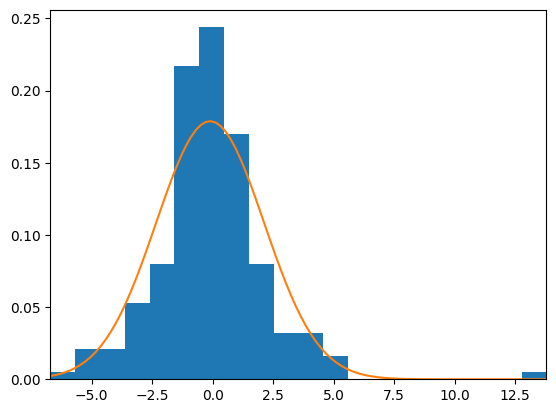

In [52]:
collect_points = {
    "result": [],
    "poll": []
}

bayern_data = pd.read_html('https://www.wahlrecht.de/umfragen/landtage/bayern.htm')
bw_data = pd.read_html('https://www.wahlrecht.de/umfragen/landtage/baden-wuerttemberg.htm')
he_data = pd.read_html('https://www.wahlrecht.de/umfragen/landtage/hessen.htm')
ni_data = pd.read_html('https://www.wahlrecht.de/umfragen/landtage/niedersachsen.htm')
nrw_data = pd.read_html('https://www.wahlrecht.de/umfragen/landtage/nrw.htm')
sh_data = pd.read_html('https://www.wahlrecht.de/umfragen/landtage/schleswig-holstein.htm')

dfs = [bayern_data[x] for x in [1,2,3]]
dfs += [bw_data[x] for x in [1,2]]
dfs += [he_data[x] for x in [1,2,3]]
dfs += [ni_data[x] for x in [1,2,3]]
dfs += [nrw_data[x] for x in [1,2,3]]
dfs += [sh_data[x] for x in [1,2,3]]

for df in dfs:
    row = df.iloc[0]

    possible_parties = ['CDU', 'CSU', 'SPD', 'GRÜNE', 'FDP', 'LINKE', 'FW', 'PIRATEN', 'AfD']


    last_election = None

    for idx, row in df.iterrows():
        institut = row['Institut']
        if institut.startswith('Landtags'):
            last_election = parse_date(institut.split(' ')[2])
            election_result = row
            # print(row)

        datum = parse_date(row['Datum'])

        if last_election and datum:
            if (last_election - datum) > timedelta(days=0):
                for p in possible_parties:
                    if p in election_result and p in row:
                        rv = parse_poll_value(election_result[p])
                        pv = parse_poll_value(row[p])

                        if rv and pv:
                            collect_points["result"].append(rv)
                            collect_points["poll"].append(pv)
                
                last_election = None


df2 = pd.DataFrame(collect_points)
df2['diff'] = df2.result - df2.poll
                
print(df2['diff'].mean())
print(df2['diff'].std())

arr = df2['diff']

plt.figure(1)
plt.hist(arr, density=True, bins=20)
plt.xlim((min(arr), max(arr)))

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)
x = np.linspace(min(arr), max(arr), 100)
plt.plot(x, norm.pdf(x, mean, sigma))

plt.show()

In [37]:
norm(x)

In [5]:
from itertools import combinations

in_parliament = {p: 0 for p in parties}
majorities = {}

number_red_green = 0

for x in bayern_forecaster.predict(1000):
    for p in x.keys():
        in_parliament[p] += 1
    for p, v in x.items():
        if v > 50:
            print(f"{p} has majority")

    pip = list(x.keys())

    for a, b in combinations(pip, 2):
        if x[a] + x[b] > 50:
            if f"{a}_{b}" in majorities:
                majorities[f"{a}_{b}"] += 1
            else:
                majorities[f"{a}_{b}"] = 1

print(in_parliament)
print(majorities)

CSU has majority
CSU has majority
CSU has majority
{'CSU': 1000, 'SPD': 1000, 'GRÜNE': 1000, 'FDP': 863, 'LINKE': 0, 'FW': 1000, 'AfD': 1000, 'Sonstige': 0}
{'CSU_SPD': 845, 'CSU_GRÜNE': 1000, 'CSU_FW': 708, 'CSU_AfD': 847, 'CSU_FDP': 199}


In [6]:
import sys
sys.path
sys.path.append('/home/helge/code/back_of_the_envelope')


from forecasters import get_forecaster
import numpy as np

fc = get_forecaster("Hessen")
diffs = []

for _ in range(1000):
    r = fc.election_result()
    ps = list(r.keys())[:7]
    diffs += [r[p] - fc.polling_data[p] for p in ps]
np.std(diffs)

2.1862270173585703